## Análise da qualidade da modulação M-PSK na presença de ruído:
Nessa prática, analisaremos o papel do ruído sobre a qualidade da modulação digital em diferentes casos. Primeiro, vamos variar o valor do parâmetro $E_b/N0$ e analisar o gráfico de constelação gerado para uma modulação BPSK

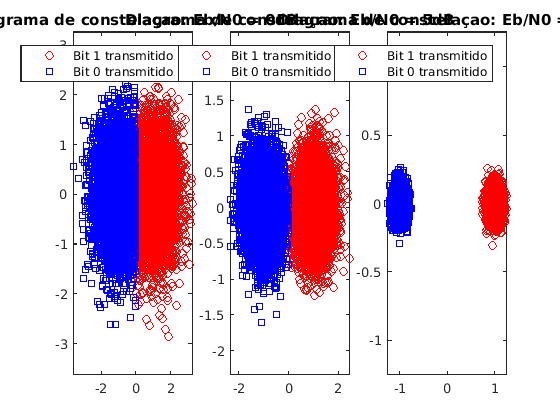

In [7]:
% Sinal M-PSK gerado pela função pskmod
M = 2;                                                 % Número de símbolo da modulação
Ns = 10e3;                                           % Número de símbolos simulados
bits2 = randi([0 M-1],Ns,1);

txSig = pskmod(bits2,M);
EbN0_dB = [0,5,20];
figure(1)
for m=1:length(EbN0_dB)
    rxSig = awgn(txSig,EbN0_dB(m));
    if(m==2)
        buffer_bpsk=rxSig;
    end
    subplot(1,3,m);
    plot(rxSig(find(real(rxSig)>0)),'ro');
    hold on;
    plot(rxSig(find(real(rxSig)<=0)),'bs');
    title(['Diagrama de constelaçao: Eb/N0 = ' num2str(EbN0_dB(m)) 'dB']);
    legend('Bit 1 transmitido','Bit 0 transmitido');
    minAx = min([real(rxSig)' imag(rxSig)']);
    maxAx = max([real(rxSig)' imag(rxSig)']);
    axis([minAx maxAx minAx maxAx]);
    %fig.PaperUnits = 'inches';
    fig.PaperPosition = [0 0 12 48];

    
end

Agora, para uma modulação 8-PSK, temos 8 simbolos diferentes:

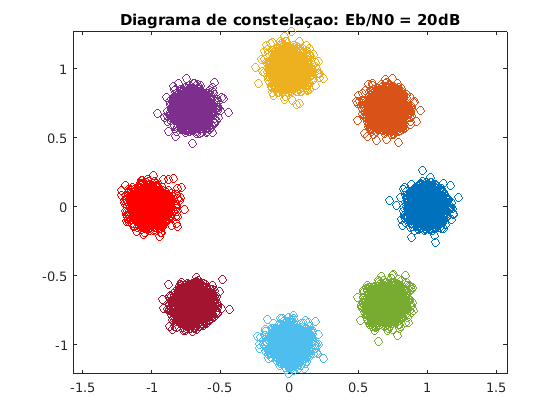

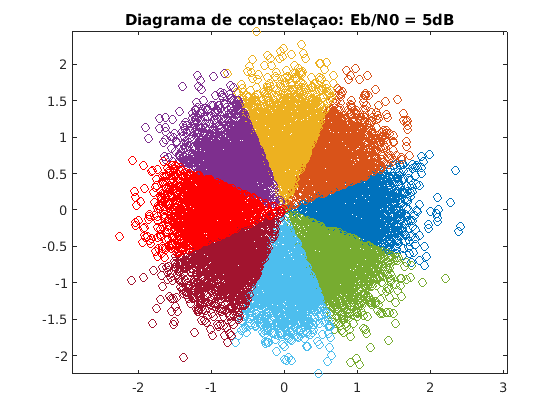

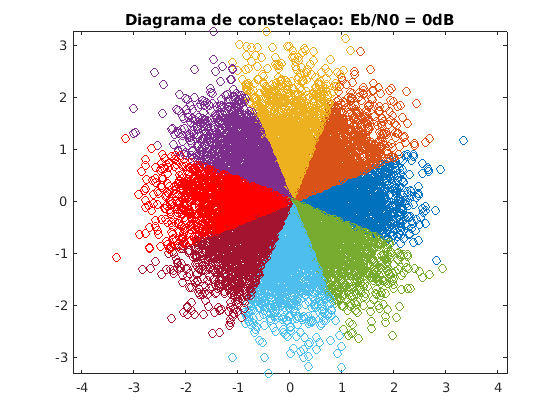

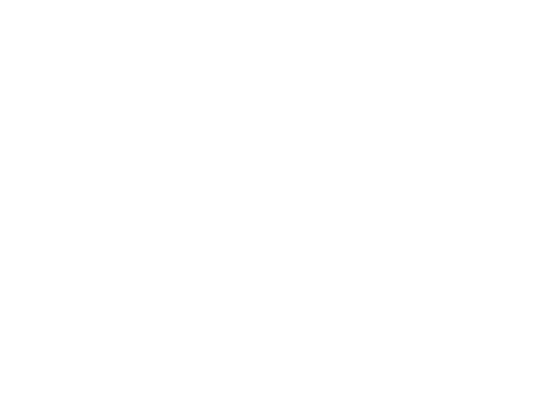

In [23]:
%Modulação 8-PSK
M = 8;                                                 % Número de símbolo da modulação
Ns = 10e3;                                           % Número de símbolos simulados
bits8 = randi([0 M-1],Ns,1);
txSig = pskmod(bits8,M);
figure(2)
EbN0_dB = [0,5,20];
for m=1:length(EbN0_dB)
    rxSig = awgn(txSig,EbN0_dB(m));
    if(m==2)
        buffer_8psk=rxSig;
     end
    figure
    plot(rxSig(find(angle(rxSig)*180/pi>=-45/2 & angle(rxSig)*180/pi<=45/2)),'o');
    hold all;
    plot(rxSig(find(angle(rxSig)*180/pi>45/2 & angle(rxSig)*180/pi<=3/2*45)),'o');
    plot(rxSig(find(angle(rxSig)*180/pi>3/2*45 & angle(rxSig)*180/pi<=5/2*45)),'o');
    plot(rxSig(find(angle(rxSig)*180/pi>5/2*45 & angle(rxSig)*180/pi<=7/2*45)),'o');
    plot(rxSig(find(angle(rxSig)*180/pi>7/2*45 & angle(rxSig)*180/pi<=11/2*45)),'ro');
    plot(rxSig(find(angle(rxSig)*180/pi<-45/2 & angle(rxSig)*180/pi>=-3/2*45)),'o');
    plot(rxSig(find(angle(rxSig)*180/pi<-3/2*45 & angle(rxSig)*180/pi>=-5/2*45)),'o');
    plot(rxSig(find(angle(rxSig)*180/pi<-5/2*45 & angle(rxSig)*180/pi>=-7/2*45)),'o');
    plot(rxSig(find(angle(rxSig)*180/pi<-7/2*45 & angle(rxSig)*180/pi>=-11/2*45)),'ro');
    title(['Diagrama de constelaçao: Eb/N0 = ' num2str(EbN0_dB(m)) 'dB']);
   % legend('000','001','011','010','100','101','111','110');
    
    minAx = min([real(rxSig)' imag(rxSig)']);
    maxAx = max([real(rxSig)' imag(rxSig)']);
    %axis([minAx maxAx minAx maxAx]);
    %ylim([-5 5])
    axis equal
   % fig.PaperUnits = 'inches';
    %fig.PaperPosition = [0 128 128 48];

    
end

Observmos que, quanto maior a quantidade de símbolos, maior tem q ser a taxa $E_b/N0$ do sinal para que ele apresente uma boa qualidade da recepção. Por exemplo, para $E_b/N0 = 5$, na BPSK as constelações já estão praticamente separadas, enquanto que na 8-PSK, os símbolos ainda estão bastante próximos, indicando a atuação mais forte do ruído sobre a qualidade da comunicação